In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [55]:
# Cargar datos
df = pd.read_csv("/content/all_data_no_nulls_dummies.csv")


In [56]:
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61809 entries, 0 to 61808
Data columns (total 25 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   user_id                                       61809 non-null  int64  
 1   age                                           61809 non-null  int64  
 2   last_month_salary                             61809 non-null  float64
 3   number_dependents                             61809 non-null  int64  
 4   default_flag                                  61809 non-null  int64  
 5   num_loans                                     61809 non-null  int64  
 6   more_90_days_overdue                          61809 non-null  int64  
 7   using_lines_not_secured_personal_assets       61809 non-null  float64
 8   number_times_delayed_payment_loan_30_59_days  61809 non-null  int64  
 9   debt_ratio                                    61809 non-null 

In [46]:
X = df[['age', 'last_month_salary', 'number_dependents','more_90_days_overdue', 'debt_ratio', 'more_90_days_overdue'  ]]
y = df['default_flag']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [47]:
# Paso 2 - Creación y entrenamiento del modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Paso 3 - Imprimiendo parámetros del modelo
print(f"Intercepto (b): {model.intercept_}")
print(f"Coeficientes (w): {model.coef_}")

Intercepto (b): [-4.5247676]
Coeficientes (w): [[-0.03165508 -0.58900643  0.09155623  0.53632488 -0.0374253   0.53632488]]


Matriz de Confusión:
[[11978    75]
 [  186   123]]
Reporte de Clasificación:
              precision    recall  f1-score   support

Buen Pagador       0.98      0.99      0.99     12053
 Mal Pagador       0.62      0.40      0.49       309

    accuracy                           0.98     12362
   macro avg       0.80      0.70      0.74     12362
weighted avg       0.98      0.98      0.98     12362



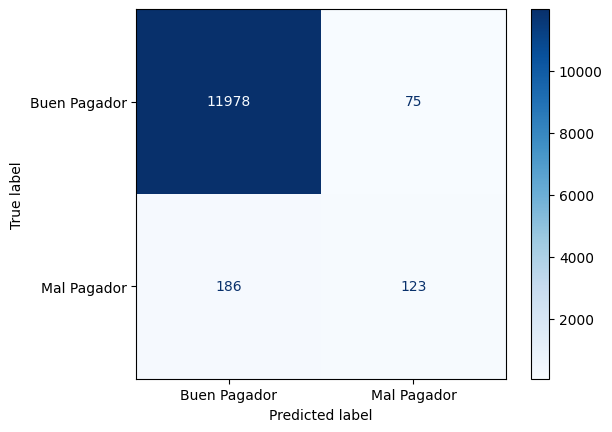

In [49]:
# Paso 4 - Evaluar el modelo con una matriz de confusión y reporte de clasificación
y_pred = model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print('Matriz de Confusión:')
print(cm)

# Reporte de clasificación
report = classification_report(y_test, y_pred, labels=[0, 1], target_names=['Buen Pagador', 'Mal Pagador'])
print('Reporte de Clasificación:')
print(report)

# Crear y mostrar la matriz de confusión gráficamente
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Buen Pagador', 'Mal Pagador'])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
# prompt: explicame los resultados de la matriz de confusion

# ... (código anterior)

# Explicación de la matriz de confusión
print("Explicación de la Matriz de Confusión:")
print("-------------------------------------")
print("Verdaderos Positivos (VP):", cm[1, 1], " - Clientes que realmente eran malos pagadores y fueron predichos correctamente.")
print("Verdaderos Negativos (VN):", cm[0, 0], " - Clientes que realmente eran buenos pagadores y fueron predichos correctamente.")
print("Falsos Positivos (FP):", cm[0, 1], " - Clientes que realmente eran buenos pagadores pero fueron predichos incorrectamente como malos pagadores.")
print("Falsos Negativos (FN):", cm[1, 0], " - Clientes que realmente eran malos pagadores pero fueron predichos incorrectamente como buenos pagadores.")

# ... (código posterior)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


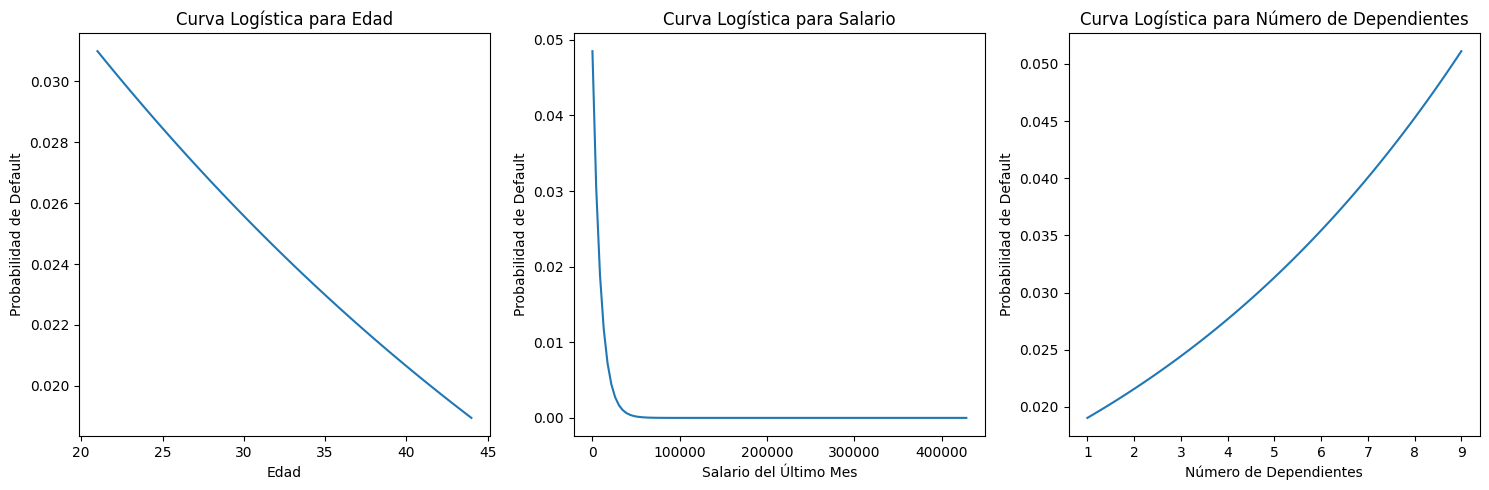

In [43]:
#Graficar curva logistica para cada variable

# Crear un rango de valores para cada variable

# Predecir probabilidades para cada rango, manteniendo las otras variables en su media
X_age = np.column_stack((age_range, np.full_like(age_range, X['last_month_salary'].mean()), np.full_like(age_range, X['number_dependents'].mean())))
X_salary = np.column_stack((np.full_like(salary_range, X['age'].mean()), salary_range, np.full_like(salary_range, X['number_dependents'].mean())))
X_dependents = np.column_stack((np.full_like(dependents_range, X['age'].mean()), np.full_like(dependents_range, X['last_month_salary'].mean()), dependents_range))

# Escalar los datos antes de predecir
X_age_scaled = scaler.transform(X_age)
X_salary_scaled = scaler.transform(X_salary)
X_dependents_scaled = scaler.transform(X_dependents)

# Predecir probabilidades
y_proba_age = model.predict_proba(X_age_scaled)[:, 1]
y_proba_salary = model.predict_proba(X_salary_scaled)[:, 1]
y_proba_dependents = model.predict_proba(X_dependents_scaled)[:, 1]

# Graficar las curvas logísticas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(age_range, y_proba_age)
plt.xlabel('Edad')
plt.ylabel('Probabilidad de Default')
plt.title('Curva Logística para Edad')

plt.subplot(1, 3, 2)
plt.plot(salary_range, y_proba_salary)
plt.xlabel('Salario del Último Mes')
plt.ylabel('Probabilidad de Default')
plt.title('Curva Logística para Salario')

plt.subplot(1, 3, 3)
plt.plot(dependents_range, y_proba_dependents)
plt.xlabel('Número de Dependientes')
plt.ylabel('Probabilidad de Default')
plt.title('Curva Logística para Número de Dependientes')

plt.tight_layout()
plt.show()


## Conclusiones

1. Predicción del Riesgo de Default:
El modelo de regresión logística desarrollado permite predecir la probabilidad de que un cliente incurra en default (no pague su crédito).
La matriz de confusión y el reporte de clasificación muestran el desempeño del modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

2. Variables Importantes:
Las curvas logísticas muestran cómo la edad, el salario del último mes y el número de dependientes influyen en la probabilidad de default.
Es importante analizar en detalle estas curvas para entender la relación entre cada variable y el riesgo crediticio.

3. Interpretación de Resultados:
La matriz de confusión proporciona información sobre los tipos de errores que comete el modelo.
Los falsos positivos (clientes buenos predichos como malos) pueden llevar a la pérdida de oportunidades de negocio.
Los falsos negativos (clientes malos predichos como buenos) representan un mayor riesgo de pérdidas financieras.

4. Próximos Pasos:
Explorar la posibilidad de incluir variables adicionales en el modelo para mejorar su precisión.
Considerar el uso de técnicas de aprendizaje automático más avanzadas para capturar relaciones no lineales en los datos.
Ajustar el umbral de decisión del modelo para equilibrar el riesgo de falsos positivos y falsos negativos según las necesidades del negocio.

5. Recomendaciones:
Utilizar el modelo como una herramienta de apoyo en la toma de decisiones de crédito, complementándolo con el análisis experto.
Monitorear continuamente el desempeño del modelo y actualizarlo según sea necesario para adaptarse a cambios en el comportamiento crediticio de los clientes.
